**[Updated 4/9/2025]**

Part1: Using separete train and test datasets.

Part2: Added saved from the NB, lemmetization full_text. Building:


TF-IDF + class_weight

TF-IDF + Style + class_weight

TF-IDF + ROS

TF-IDF + Style + ROS

Try both with lemmatized


Instead of several approaches, we will run code in a loop which immitates a gridcv.

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report
from scipy.sparse import hstack, csr_matrix
import pandas as pd
from src.utils import metrics, plot_confusion_matrix, store_metrics

# Define experiments

In [42]:
train_df = pd.read_csv("data/byarticle_clean.tsv", sep="\t")
test_df = pd.read_csv("data/byarticle_clean_test.tsv", sep="\t")

train_df_lem = pd.read_csv("data/byarticle_train_lemmatized.tsv", sep="\t")
test_df_lem = pd.read_csv("data/byarticle_test_lemmatized.tsv", sep="\t")


In [43]:
experiments = [
    {
        "name": "TF-IDF + class_weight",
        "train_df": train_df,
        "test_df": test_df,
        "text_col": "full_text",
        "vectorizer": TfidfVectorizer(max_features=10000, stop_words="english", ngram_range=(1,2)),
        "style": False,
        "balancing": "class_weight"
    },
    {
        "name": "TF-IDF + Style + class_weight",
        "train_df": train_df,
        "test_df": test_df,
        "text_col": "full_text",
        "vectorizer": TfidfVectorizer(max_features=10000, stop_words="english", ngram_range=(1,2)),
        "style": True,
        "balancing": "class_weight"
    },
    {
        "name": "TF-IDF + ROS",
        "train_df": train_df,
        "test_df": test_df,
        "text_col": "full_text",
        "vectorizer": TfidfVectorizer(max_features=10000, stop_words="english", ngram_range=(1,2)),
        "style": False,
        "balancing": "ros"
    },
    {
        "name": "TF-IDF + Style + ROS",
        "train_df": train_df,
        "test_df": test_df,
        "text_col": "full_text",
        "vectorizer": TfidfVectorizer(max_features=10000, stop_words="english", ngram_range=(1,2)),
        "style": True,
        "balancing": "ros"
    },
    {
        "name": "TF-IDF + class_weight + Lemmatized",
        "train_df": train_df_lem,
        "test_df": test_df_lem,
        "text_col": "lemmatized_text",
        "vectorizer": TfidfVectorizer(max_features=10000, stop_words="english", ngram_range=(1,2)),
        "style": False,
        "balancing": "class_weight"
    },
    {
        "name": "TF-IDF + Style + class_weight + Lemmatized",
        "train_df": train_df_lem,
        "test_df": test_df_lem,
        "text_col": "lemmatized_text",
        "vectorizer": TfidfVectorizer(max_features=10000, stop_words="english", ngram_range=(1,2)),
        "style": True,
        "balancing": "class_weight"
    },
    {
        "name": "TF-IDF + ROS + Lemmatized",
        "train_df": train_df_lem,
        "test_df": test_df_lem,
        "text_col": "lemmatized_text",
        "vectorizer": TfidfVectorizer(max_features=10000, stop_words="english", ngram_range=(1,2)),
        "style": False,
        "balancing": "ros"
    },
    {
        "name": "TF-IDF + Style + ROS + Lemmatized",
        "train_df": train_df_lem,
        "test_df": test_df_lem,
        "text_col": "lemmatized_text",
        "vectorizer": TfidfVectorizer(max_features=10000, stop_words="english", ngram_range=(1,2)),
        "style": True,
        "balancing": "ros"
    }
]


results =[]

# Style features

In [44]:
style_features = ['uppercase_ratio', 'exclamation_count', 'avg_sentence_length']

# Loop with experiments


--- TF-IDF + class_weight ---
Accuracy: 0.75
Balanced Accuracy: 0.75
Precision: 0.76
Recall: 0.74
F1: 0.75
AUC: 0.84


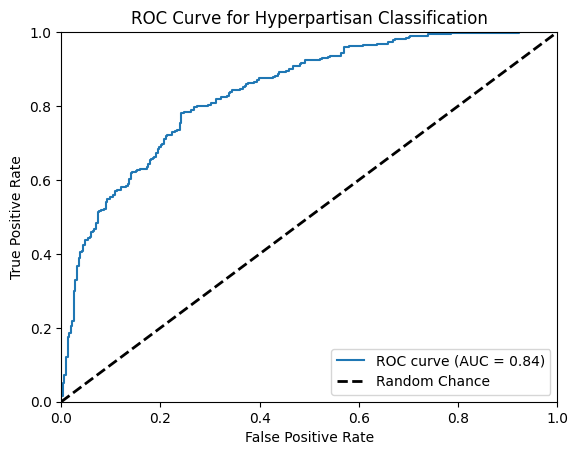


--- TF-IDF + Style + class_weight ---
Accuracy: 0.76
Balanced Accuracy: 0.76
Precision: 0.76
Recall: 0.75
F1: 0.76
AUC: 0.84


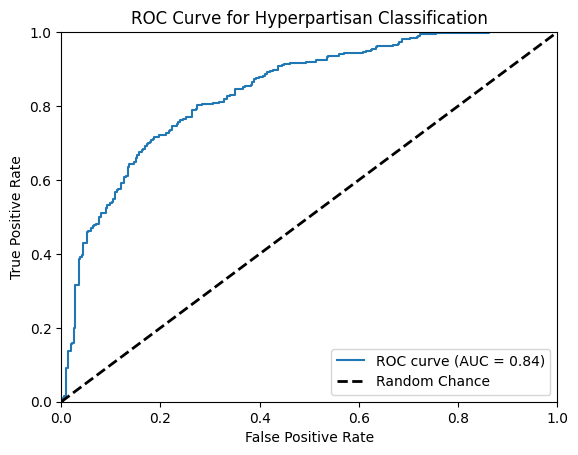


--- TF-IDF + ROS ---
Accuracy: 0.76
Balanced Accuracy: 0.76
Precision: 0.79
Recall: 0.72
F1: 0.75
AUC: 0.84


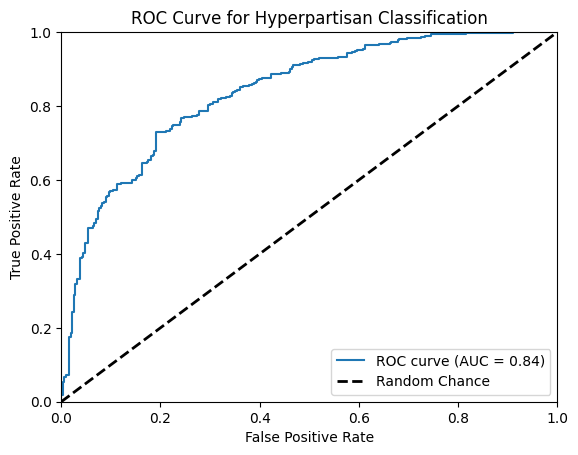


--- TF-IDF + Style + ROS ---
Accuracy: 0.76
Balanced Accuracy: 0.76
Precision: 0.79
Recall: 0.71
F1: 0.75
AUC: 0.84


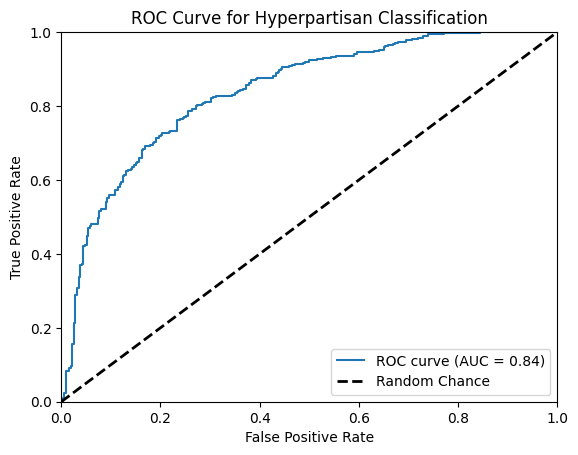


--- TF-IDF + class_weight + Lemmatized ---
Accuracy: 0.76
Balanced Accuracy: 0.76
Precision: 0.76
Recall: 0.75
F1: 0.76
AUC: 0.84


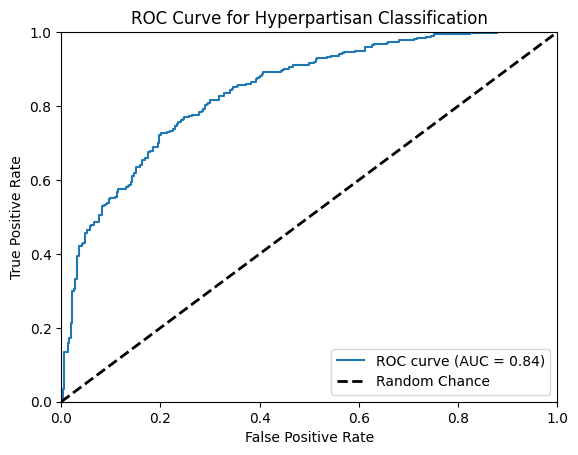


--- TF-IDF + Style + class_weight + Lemmatized ---
Accuracy: 0.76
Balanced Accuracy: 0.76
Precision: 0.76
Recall: 0.75
F1: 0.75
AUC: 0.84


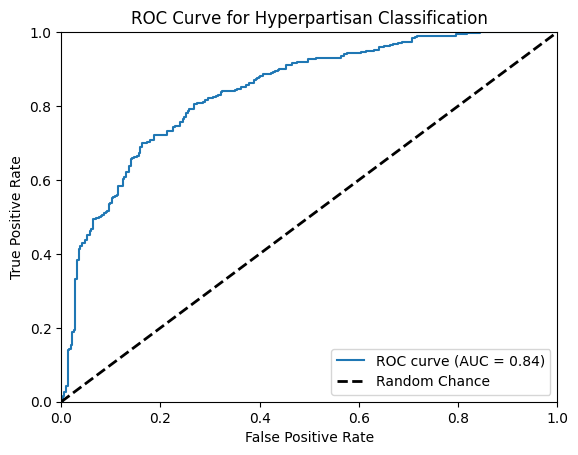


--- TF-IDF + ROS + Lemmatized ---
Accuracy: 0.75
Balanced Accuracy: 0.75
Precision: 0.77
Recall: 0.72
F1: 0.74
AUC: 0.84


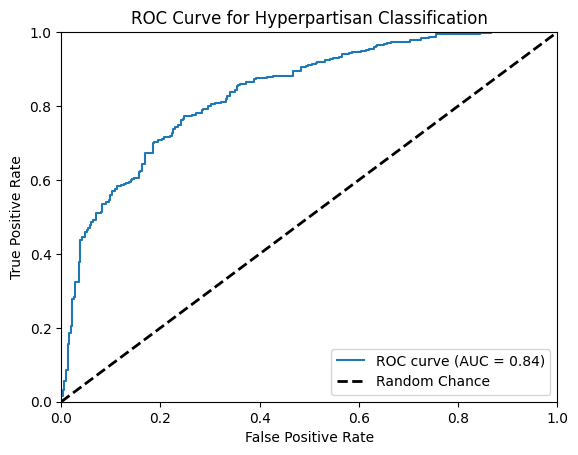


--- TF-IDF + Style + ROS + Lemmatized ---
Accuracy: 0.75
Balanced Accuracy: 0.75
Precision: 0.77
Recall: 0.72
F1: 0.75
AUC: 0.84


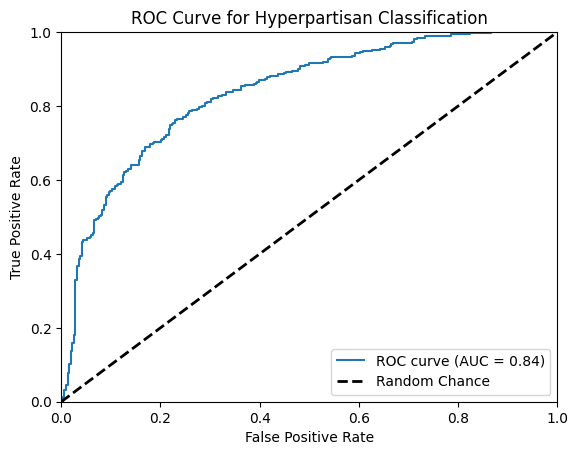

In [45]:
for exp in experiments:
    print(f"\n--- {exp['name']} ---")

    # Get dataframes and column references
    df_train = exp['train_df']
    df_test = exp['test_df']
    X_train_text = df_train[exp['text_col']]
    X_test_text = df_test[exp['text_col']]
    y_train = df_train["label"]
    y_test = df_test["label"]

    # Vectorize text
    vectorizer = exp['vectorizer']
    X_train_vec = vectorizer.fit_transform(X_train_text)
    X_test_vec = vectorizer.transform(X_test_text)

    # Handle style features if needed
    if exp['style']:
        scaler = MinMaxScaler()
        X_train_style = csr_matrix(scaler.fit_transform(df_train[style_features]))
        X_test_style = csr_matrix(scaler.transform(df_test[style_features]))
        X_train_comb = hstack([X_train_vec, X_train_style])
        X_test_comb = hstack([X_test_vec, X_test_style])
    else:
        X_train_comb = X_train_vec
        X_test_comb = X_test_vec

    # Handle balancing
    if exp['balancing'] == "ros":
        ros = RandomOverSampler(random_state=0)
        X_train_final, y_train_final = ros.fit_resample(X_train_comb, y_train)
        clf = LogisticRegression(max_iter=1000, solver='liblinear')
    else:
        X_train_final = X_train_comb
        y_train_final = y_train
        clf = LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear')

    # Train model
    clf.fit(X_train_final, y_train_final)
    y_pred = clf.predict(X_test_comb)
    y_proba = clf.predict_proba(X_test_comb)[:, 1]

    # Evaluate
    metrics(y_test, y_pred, y_proba)
    # plot_confusion_matrix(y_test, y_pred)  # Optional
    store_metrics(results, "Logistic Regression", exp['name'], y_test, y_pred, y_proba)


In [46]:
import pandas as pd

results_df = pd.DataFrame(results)
print("\n=== Final Comparison Table ===")
print(results_df)



=== Final Comparison Table ===
                 Model                                       Setup  Accuracy  \
0  Logistic Regression                       TF-IDF + class_weight     0.752   
1  Logistic Regression               TF-IDF + Style + class_weight     0.760   
2  Logistic Regression                                TF-IDF + ROS     0.764   
3  Logistic Regression                        TF-IDF + Style + ROS     0.760   
4  Logistic Regression          TF-IDF + class_weight + Lemmatized     0.760   
5  Logistic Regression  TF-IDF + Style + class_weight + Lemmatized     0.756   
6  Logistic Regression                   TF-IDF + ROS + Lemmatized     0.750   
7  Logistic Regression           TF-IDF + Style + ROS + Lemmatized     0.755   

   Balanced Accuracy  Precision  Recall  F1 Score    AUC  
0              0.752      0.756   0.742     0.749  0.839  
1              0.760      0.764   0.752     0.758  0.840  
2              0.764      0.790   0.720     0.753  0.838  
3          

Logistic Regression — TF-IDF + Style + class_weight (+ optionally lemmatized)

    Strong, balanced F1 = 0.758

    Highest AUC = 0.841

    Simple to tune further with GridSearchCV

    Robust to class imbalance and likely generalizes well

Observations

    Lemmatization did not dramatically improve performance

        Slight impact on recall and AUC, but overall F1 stayed similar or dropped slightly

        Not essential, but doesn’t hurt either

    ROS vs. class_weight:

        Performance is very close

        class_weight='balanced' is easier to use and integrates better with GridSearchCV

    Stylistic features help slightly

        Especially when paired with class_weight and lemmatization

        Adds 0.004–0.009 to F1 or AUC depending on setup

    TF-IDF alone already performs very well

In [47]:
result = [row for row in results if row["Setup"] == "TF-IDF + Style + class_weight"]
df_single = pd.DataFrame(result)
df_single.to_csv("results/byarticleBaseline_results_sepTest.csv", mode='a', index=False, header=False)